## AR TAGS PRACTICAL

# Introduction to AR Tags

## Requirements

This practical requires the library `opencv-contrib-python`, which has additional modules that are not included in `opencv-python`. Install with the following command:

`pip3 install opencv-contrib-python`

## Generating AR Tags

You can generate and print your own AR tags for any use case. ArUco contains a number of AR Tag Libraires:
* `DICT_4X4_100`
* `DICT_4X4_1000`
* `DICT_4X4_250`
* `DICT_4X4_50`
* `DICT_5X5_100`
* `DICT_5X5_1000`
* `DICT_5X5_250`
* `DICT_5X5_50`
* `DICT_6X6_100`
* `DICT_6X6_1000`
* `DICT_6X6_250`
* `DICT_6X6_50`
* `DICT_7X7_100`
* `DICT_7X7_1000`
* `DICT_7X7_250`
* `DICT_7X7_50`
* `DICT_APRILTAG_16H5`
* `DICT_APRILTAG_16h5`
* `DICT_APRILTAG_25H9`
* `DICT_APRILTAG_25h9`
* `DICT_APRILTAG_36H10`
* `DICT_APRILTAG_36H11`
* `DICT_APRILTAG_36h10`
* `DICT_APRILTAG_36h11`
* `DICT_ARUCO_ORIGINAL`
 
The tags of format `DICT_{SIZE}x{SIZE}_COUNT` are ArUco based tags that use `SIZExSIZE` bits for tag information and have `COUNT` distinct tags. We will be using the ArUco original librariy to create two tags:

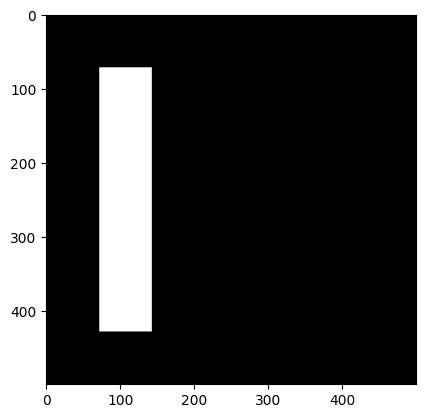

In [2]:
%matplotlib inline
import numpy as np
import cv2
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
arucoDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_ARUCO_ORIGINAL)
SIZE = 500 # pixels
marker = np.zeros((SIZE, SIZE, 1), dtype=np.uint8)
ID = 0
cv2.aruco.generateImageMarker(arucoDict, ID, SIZE, marker, 1)
cv2.imwrite('DICT_ARUCO_ORIGINAL_id_{}_{}.png'.format(ID, SIZE), marker)
def AR_plot(imag):
    '''
    Plots an AR tag so I can see it given the name from cv2.imwrite

    Parameters
    ----------
    
    imag: name from cv2.imwrite

    Plots
    -----

    AR tag (in black and white because it looks weird in yellow and purple)

    '''
    gry = cv2.cvtColor(imag, cv2.COLOR_GRAY2RGB)
    plt.imshow(gry)
AR_plot(marker)
def AR_splot(imag, splt, j):
    '''
    Subplots an AR tag so I can see it given the name from cv2.imwrite

    Parameters
    ----------
    
    imag: name from cv2.imwrite

    splt: the plot the image will be shown on

    j: the row the image will be shown on

    Plots
    -----

    AR tag (in black and white because it looks weird in yellow and purple)

    '''
    
    gry = cv2.cvtColor(imag, cv2.COLOR_GRAY2RGB)
    splt[j].imshow(gry)

### CHALLENGE 1: Generating AR Tags
Generate AR tags for the dictionary `DICT_APRILTAG_16H5` for ids `7, 18,` and `23`.
* These should be of size 500 pixels by 500 pixels.

<Figure size 640x480 with 0 Axes>

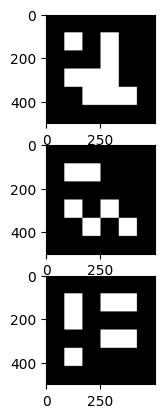

In [3]:
#get dict, set size, and list IDs
ATAG = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16H5)
SIZE = 500 # pixels
marker = np.zeros((SIZE, SIZE, 1), dtype=np.uint8)
idlst = [7, 18, 23]

#Generate each image and use plt.subplots to plot each image. I was going to use a for loop but it got late so I just copy/pasted the code from above 3 times.
plt.figure()
var, arrg = plt.subplots(3, 1)
for i in range(3):
    marker = np.zeros((SIZE, SIZE, 1), dtype=np.uint8)
    cv2.aruco.generateImageMarker(ATAG, idlst[i], SIZE, marker, 1)
    cv2.imwrite('DICT_APRILTAG_16H5_id_{}_{}.png'.format(idlst[i], SIZE), marker)
    AR_splot(marker, arrg, i)

## Detecting AR Tags
The ArUco library has built-in functionality for detecting AR tags within images:


(array([[[113., 113.],
        [412., 113.],
        [412., 412.],
        [113., 412.]]], dtype=float32), array([[[563., 563.],
        [862., 563.],
        [861., 862.],
        [563., 862.]]], dtype=float32))


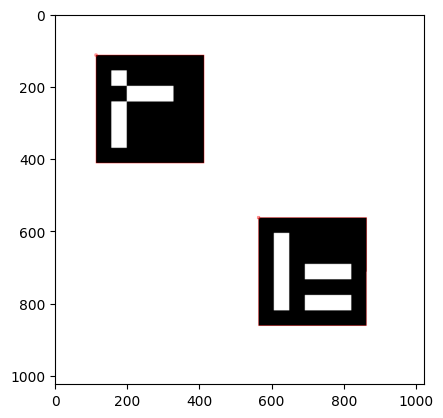

In [4]:
tags = cv2.imread('data/two_tags_ARUCO_ORIGINAL.png')
arucoDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_ARUCO_ORIGINAL)
corners, ids, rejects = cv2.aruco.detectMarkers(cv2.cvtColor(tags, cv2.COLOR_BGR2GRAY), arucoDict)
print(corners)
detection = cv2.aruco.drawDetectedMarkers(tags, corners, borderColor=(255, 0, 0))
plt.imshow(detection)

### CHALLENGE 2: Calculating Distance Between Tags
Calculate the distance between the AR tags in the file `data/two_tags_APRILTAG_16H5.png` in centimeters. Some notes to keep in mind:
* The real-world width of each tag is 3.
* The dictionary being used is `APRILTAG_16H5`.
* The image view is exactly perpendicular to the camera.
* Both `cv2` and `numpy` are useful packages here.

(array([[[129., 471.],
        [428., 471.],
        [428., 770.],
        [129., 770.]]], dtype=float32), array([[[584., 201.],
        [883., 201.],
        [883., 500.],
        [584., 500.]]], dtype=float32))
428.0 471.0 584.0 201.0
1.5652173913043477


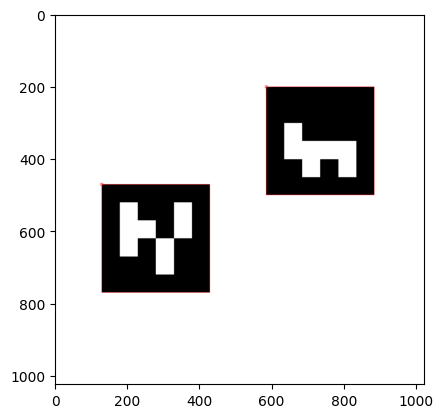

In [10]:
import math
#import the image data
tags = cv2.imread('data/two_tags_APRILTAG_16H5.png')
ATAG = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16H5)
corners, ids, rejects = cv2.aruco.detectMarkers(cv2.cvtColor(tags, cv2.COLOR_BGR2GRAY), ATAG)
print(corners)
detection = cv2.aruco.drawDetectedMarkers(tags, corners, borderColor=(255, 0, 0))
plt.imshow(detection)

#find the proper conversion factor between real world units and pixels
di = corners[0][0][1] - corners[0][0][0]
cf = di[0]/3

#find dist between lines
x1, y1 = corners[0][0][1]
x2, y2 = corners[1][0][0]
print(x1, y1, x2, y2)
dist = x2-x1
rdist = dist/cf
print(rdist)
#this feels weird... I think I did this wrong, as I did not use cv2 or numpy